In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\omkar.karve\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


2.1.0


In [2]:
from tensorflow.compat.v1 import InteractiveSession # This is needed to run on Windows 10 laptop with Cuda
# This is needed to run on Windows 10 laptop with Cuda
print(tf.__version__)

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2.1.0


GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [3]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [4]:
# Download and assign the data set using load_data()

(x_train, y_train),(x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 1s 0us/step


#### Inspect the dataset

In [5]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [6]:
# Inspect the shape of the data
x_train.shape


(25000,)

In [7]:
# Display the first dataset element input
# Notice encoding
x_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [9]:
# Display the first dataset element output
y_train[0]


1

#### Load dataset with different options

In [12]:
# Load the dataset with defaults

imdb.load_data(path='imdb.npz',
              index_from=3)
# ~/.keras/dataset/

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [13]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=1000)


((array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 

In [15]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10, num_words=1000, oov_char=2)


((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [16]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [17]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [18]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()


1646592/1641221 [==============================] - 0s 0us/step


In [19]:
# View the word index as a dictionary,
# accounting for index_from.
index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}


In [20]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']


52256

In [26]:
# View an input sentence

print(imdb_word_index['the'])

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

4


['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [29]:
# Get the sentiment value
y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [31]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train),(x_test,y_test) = imdb.load_data()

#### Preprocess the data with padding

In [33]:
# Inspect the input data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(25000,)
(25000,)
(25000,)
(25000,)


In [34]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', 
                                                               truncating='pre')


In [36]:
# Inspect the output data shape
print(padded_x_train.shape)
print(padded_x_train[0])


(25000, 300)
[    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670 22665     9    35   480   284     5   150     4   172   112
   167 21631   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18 19193     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4 31050     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    13   104    88  

#### Create a Masking layer

In [37]:
# Import numpy 
import numpy as np


In [39]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train,-1)
print(padded_x_train.shape)

(25000, 300, 1, 1)


In [41]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [42]:
# Pass tf_x_train to it
masked_x_train = masking_layer(tf_x_train)


In [44]:
# Look at the dataset

print(tf_x_train)
print(masked_x_train)

tf.Tensor(
[[[[1.000e+00]]

  [[1.400e+01]]

  [[2.200e+01]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 [[[1.000e+00]]

  [[1.940e+02]]

  [[1.153e+03]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 [[[1.000e+00]]

  [[1.400e+01]]

  [[4.700e+01]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 ...


 [[[1.000e+00]]

  [[1.100e+01]]

  [[6.000e+00]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 [[[1.000e+00]]

  [[1.446e+03]]

  [[7.079e+03]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 [[[1.000e+00]]

  [[1.700e+01]]

  [[6.000e+00]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]], shape=(25000, 300, 1, 1), dtype=float32)
tf.Tensor(
[[[[1.000e+00]]

  [[1.400e+01]]

  [[2.200e+01]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 [[[1.000e+00]]

  [[1.940e+02]]

  [[1.153e+03]]

  ...

  [[0.000e+00]]

  [[0.000e+00]]

  [[0.000e+00]]]


 [[[1.000e+00]]

  [[1.400e+01]]

  [[4.70

In [47]:
# Look at the ._keras_mask for the dataset
print(masked_x_train._keras_mask)
print(tf_x_train._keras_mask) # this will fail


tf.Tensor(
[[[ True]
  [ True]
  [ True]
  ...
  [False]
  [False]
  [False]]

 [[ True]
  [ True]
  [ True]
  ...
  [False]
  [False]
  [False]]

 [[ True]
  [ True]
  [ True]
  ...
  [False]
  [False]
  [False]]

 ...

 [[ True]
  [ True]
  [ True]
  ...
  [False]
  [False]
  [False]]

 [[ True]
  [ True]
  [ True]
  ...
  [False]
  [False]
  [False]]

 [[ True]
  [ True]
  [ True]
  ...
  [False]
  [False]
  [False]]], shape=(25000, 300, 1), dtype=bool)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '_keras_mask'

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [59]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)


In [67]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant((([0],[1],[5],[500])))
#shape of sequence of indices (batch, sequence, features)
sequence_of_embeddings = embedding_layer(sequence_of_indices)
print(sequence_of_embeddings.shape)
print(sequence_of_embeddings)

(4, 1, 16)
tf.Tensor(
[[[-0.00770904  0.04692097  0.02012486 -0.03399613 -0.03189063
    0.00940977  0.04772184 -0.02070488  0.03035805  0.01830271
    0.04818766  0.01372326  0.00425174  0.04064311  0.02398472
   -0.04474435]]

 [[-0.00173507 -0.0499667  -0.03594355  0.03792052 -0.02940575
    0.01796051  0.02368579  0.04256989 -0.01066665 -0.011508
   -0.01217892 -0.03625873  0.01563143  0.00571803  0.04900717
   -0.00552535]]

 [[-0.02754815 -0.03537084 -0.03953522 -0.0009303   0.03039023
   -0.03321102  0.00367044  0.00595316 -0.02675568 -0.03168929
    0.0141421   0.02399227  0.04789884 -0.01842116  0.01245034
    0.00692701]]

 [[-0.00152105 -0.0447723  -0.0497669  -0.01042248 -0.0222538
    0.00045408  0.03809645 -0.03171574  0.04175514 -0.01133571
    0.03368345  0.01083151 -0.0184445  -0.04664895  0.00897645
   -0.00527821]]], shape=(4, 1, 16), dtype=float32)


In [69]:
# Inspect the Embedding layer weights using get_weights()

weights = embedding_layer.get_weights()
print(weights)
print(np.array(weights).shape)

[array([[-0.00770904,  0.04692097,  0.02012486, ...,  0.04064311,
         0.02398472, -0.04474435],
       [-0.00173507, -0.0499667 , -0.03594355, ...,  0.00571803,
         0.04900717, -0.00552535],
       [ 0.02355262,  0.00674796,  0.01960503, ..., -0.00382177,
         0.02089684, -0.0318689 ],
       ...,
       [-0.01885115, -0.0104336 , -0.0147663 , ..., -0.03072448,
        -0.04596573, -0.03066056],
       [-0.02056266, -0.03235048,  0.02405715, ...,  0.0014303 ,
         0.02917844, -0.01145347],
       [-0.00152105, -0.0447723 , -0.0497669 , ..., -0.04664895,
         0.00897645, -0.00527821]], dtype=float32)]
(1, 501, 16)


In [63]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([-0.03693639,  0.04711595, -0.03755499,  0.0009927 , -0.0263589 ,
        0.01670611, -0.00097736,  0.02822841,  0.03103436,  0.04271455,
       -0.00865202,  0.00083437, -0.00951665, -0.02701598, -0.04016546,
       -0.0004255 ], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [65]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [66]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices )
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(4, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [ True],
       [ True]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [70]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [72]:
# Load the dataset
(x_train, y_train),(x_test, y_test) = get_and_pad_imdb_dataset()


In [71]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [73]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [75]:
# Swap the keys and values of the word index

inv_imdb_word_index={value: key for key, value in imdb_word_index.items()}


In [77]:
# View the first dataset example sentence

{inv_imdb_word_index[index] for index in x_train[100] if index  > 2}

{'10',
 '2',
 'a',
 'about',
 'all',
 'am',
 'and',
 'are',
 'as',
 'because',
 'been',
 'black',
 'box',
 'bucks',
 'bunch',
 'but',
 'care',
 'cartoons',
 'clear',
 'crap',
 'curiosity',
 'david',
 "didn't",
 'disappointing',
 "don't",
 'drawn',
 'dvd',
 'everything',
 'except',
 'fan',
 'few',
 'for',
 'foul',
 'found',
 'good',
 'grabbed',
 'great',
 'had',
 'have',
 "he's",
 'highly',
 'hotel',
 'hour',
 'i',
 'immediately',
 'in',
 'is',
 'it',
 "it's",
 'just',
 'keep',
 'know',
 'language',
 'left',
 'let',
 'loud',
 'lynch',
 'made',
 'make',
 'may',
 'maybe',
 'me',
 'might',
 'money',
 'mouthed',
 'movie',
 'my',
 'name',
 'neighbors',
 'of',
 'on',
 'out',
 'part',
 'peaks',
 'public',
 'recommend',
 'release',
 'room',
 'set',
 'so',
 'sound',
 'spend',
 'that',
 'the',
 'this',
 'to',
 'too',
 'twin',
 'under',
 'unfunny',
 'was',
 'well',
 'what',
 "what's",
 'when',
 'white',
 'you',
 'your'}

#### Build an Embedding layer into a model

In [80]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [81]:
# Specify an embedding dimension

embedding_dim = 16


In [83]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
                            tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
                            tf.keras.layers.GlobalAveragePooling1D(),
                            tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [85]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)


In [86]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [87]:
# Compile the model with a binary cross-entropy loss

model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [88]:
# Train the model using .fit(), savng its history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 18s 711us/sample - loss: 0.6900 - accuracy: 0.5426 - val_loss: 0.0175 - val_accuracy: 0.6281
Epoch 2/5
25000/25000 [==============================] - 17s 698us/sample - loss: 0.6708 - accuracy: 0.6940 - val_loss: 0.0167 - val_accuracy: 0.7469
Epoch 3/5
25000/25000 [==============================] - 17s 684us/sample - loss: 0.6293 - accuracy: 0.7583 - val_loss: 0.0155 - val_accuracy: 0.7672
Epoch 4/5
25000/25000 [==============================] - 17s 687us/sample - loss: 0.5789 - accuracy: 0.7922 - val_loss: 0.0142 - val_accuracy: 0.7859
Epoch 5/5
25000/25000 [==============================] - 17s 682us/sample - loss: 0.5307 - accuracy: 0.8168 - val_loss: 0.0131 - val_accuracy: 0.8000


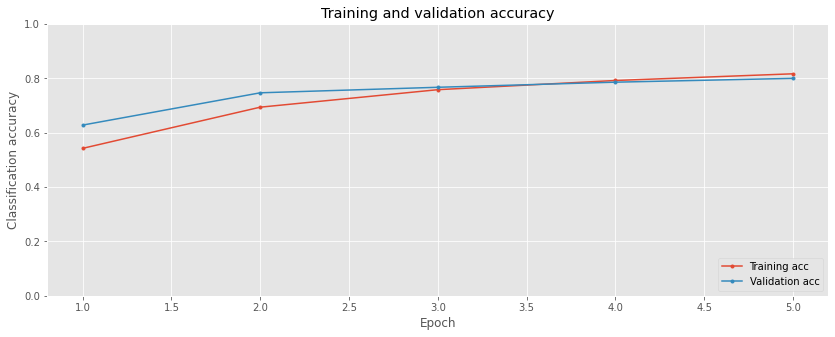

In [89]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [90]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [92]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [93]:
# Create a SimpleRNN layer and test it

#SimpleRNN, LSTM, GRU All these expect input in this format batch, sequence, features

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [97]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.,1.],[2.,2.],[56.,-100]]])
layer_output = simplernn_layer(sequence)
print(layer_output)

tf.Tensor(
[[-1.          1.          1.          1.          1.          1.
  -1.         -0.99999994 -1.          0.99862576 -1.         -1.
   1.          1.          1.         -1.        ]], shape=(1, 16), dtype=float32)


#### Load and transform the IMDB review sentiment dataset

In [98]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [99]:
# Load the dataset
(x_train, y_train),(x_test,y_test) = get_and_pad_imdb_dataset(maxlen=250)


In [100]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [101]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [102]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())


In [105]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_index_value+1, output_dim = embedding_dim, mask_zero = True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


#### Compile and fit the model

In [107]:
# Compile the model with binary cross-entropy loss
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [108]:
# Fit the model and save its training history
history = model.fit(x_train,y_train,epochs=3, batch_size=32)


Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 254s 10ms/sample - loss: 0.4008 - accuracy: 0.8178
Epoch 2/3
25000/25000 [==============================] - 247s 10ms/sample - loss: 0.2263 - accuracy: 0.9130
Epoch 3/3
25000/25000 [==============================] - 245s 10ms/sample - loss: 0.1812 - accuracy: 0.9334


#### Plot learning curves

In [109]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: 'val_accuracy'

#### Make predictions with the model

In [110]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key,value in imdb_word_index.items()}
{inv_imdb_word_index[index] for index in x_test[0] if index>2}

{'10',
 '8',
 "80's",
 'a',
 'almost',
 'and',
 'awesome',
 'bad',
 'be',
 'because',
 'before',
 'best',
 'blood',
 'br',
 'budget',
 'can',
 'cool',
 'creepiness',
 'crew',
 'dawn',
 'decent',
 'dedicated',
 "doesn't",
 'done',
 'early',
 'enjoyed',
 'everything',
 'example',
 'fierce',
 'film',
 'for',
 'freaked',
 'fun',
 'girlfriend',
 'got',
 'great',
 'have',
 'hell',
 'here',
 'i',
 "i'd",
 'idea',
 'if',
 'ignore',
 'in',
 'is',
 'it',
 "it's",
 'just',
 'kids',
 'killer',
 'lot',
 'me',
 'minimal',
 'more',
 'most',
 'movie',
 'my',
 'of',
 'off',
 'on',
 'other',
 'out',
 'plenty',
 'really',
 'reviews',
 'ripped',
 'say',
 'scares',
 'script',
 'she',
 'slasher',
 'slashers',
 'so',
 'something',
 'than',
 'that',
 'the',
 'there',
 "there's",
 'this',
 'to',
 'turn',
 'unique',
 'was',
 'watches',
 'what',
 'with',
 'wrong',
 'you'}

In [111]:
# Get the model prediction using model.predict()
model.predict(x_test[None,0,:])


array([[0.9943236]], dtype=float32)

In [112]:
# Get the corresponding label
y_test[0]


1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [113]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [131]:
# Load the dataset

(x_train, y_train),(x_test,y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

In [115]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [132]:
# Get the word index using get_imdb_word_index()


imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [133]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [121]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=32,  return_sequences=True),
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [124]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8),merge_mode='sum',
                                 backward_layer=tf.keras.layers.GRU(units=8, go_backwards=True)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [128]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


#### Compile and fit the model

In [129]:
# Compile the model

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [134]:
# Train the model, saving its history

history = model.fit(x_train, y_train, batch_size=32, epochs=3)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 634s 25ms/sample - loss: 0.4090 - accuracy: 0.8066
Epoch 2/3
25000/25000 [==============================] - 617s 25ms/sample - loss: 0.2525 - accuracy: 0.9019
Epoch 3/3
25000/25000 [==============================] - 615s 25ms/sample - loss: 0.1988 - accuracy: 0.9249


In [135]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: 'val_accuracy'